# TUTORIAL 1 : NVT Lennard-Jones solid

Authors: Chris King, James Grant

This tutorial aims to introduce you to the fundamental concepts of molecular dynamics simulation by using it to determine the thermal behaviour of a model system.

In [1]:
# import everything you need for this tutorial now
import matplotlib.pyplot as plt

## Introduction to Molecular Dynamics:

Molecular Dynamics (MD) is a classical potential modelling simulation technique.  Potential models employ several approximations compared to quantum mechanical modelling, such as: integrating electrons out of calculations, all charges are point charges and describing interatomic (intermolecular) interactions as potential functions.  MD uses these potential functions and their associated force fields to plot trajectories of mobile objects by integrating Newton's Equations of Motion (EOMs).  This allows the velocities of any object at any given instant in the simulation to be calculated.  The time interval at which velocities are recalculated depends on the timescale over which interactions occur.  

MD is a particularly useful way to model liquids and gases as well as predict transport properties of chemical species in solid and/or liquid solutions, such as diffusion, electrical conductivity and viscocity.  In this session, you will use molecular dynamics to simulate the phase behaviour of a model system.

## The Lennard-Jones Solid:

Now that you've become acquainted with the nature of MD simulations, we shall now apply some of the concepts and methods to explore the properties of a model system: a 3D Lennard-Jones material.  

A Lennard-Jones material is a hypothetical material which is made up of chargeless particles that only interact with each other via the Lennard-Jones potential.  The Lennard-Jones potential has the following form:

$$\phi(r_{ij}) = 4\epsilon\biggl[\Bigl(\frac{\sigma}{r_{ij}}\Bigr)^{12}-\Bigl(\frac{\sigma}{r_{ij}}\Bigr)^{6}\biggr]$$

where $\phi(r_{ij})$ is the potential energy of the interaction between particles i and j separated by a distance $r_{ij}$, $\epsilon$ is the parameter relating to the depth of the potential well and $\sigma$ is the finite distance at which the interaction is zero.  The positive term represents the repulsive component of the interactions which stems from phenomena like the Pauli Exclusion Principle and is dominant at short distances.  The negative term represents the attractive component of the interaction and stems from phenomena like London Dispersion and dominates at longer distances.  

Figure 1 illustrates the shape of $\phi(r_{ij})$ and the corresponding force acting between two objects, $F(r_{ij}) = -\frac{\mathrm{d}\phi(r_{ij})}{\mathrm{d}r_{ij}}$, as a function of $r_{ij}$.  When $F(r_{ij})$ is positive, the resultant force acting between the two objects is repulsive and when $F(r_{ij})$ is negative, the resultant force are attractive.  As you can see, at $r_{ij}<r_{min}$, $F(r_{ij})$ is repulsive and the two objects repel each other, and when $r_{ij} <  r_{min}$, $F(r_{ij})$ is attractive and the two objects move towards each other.


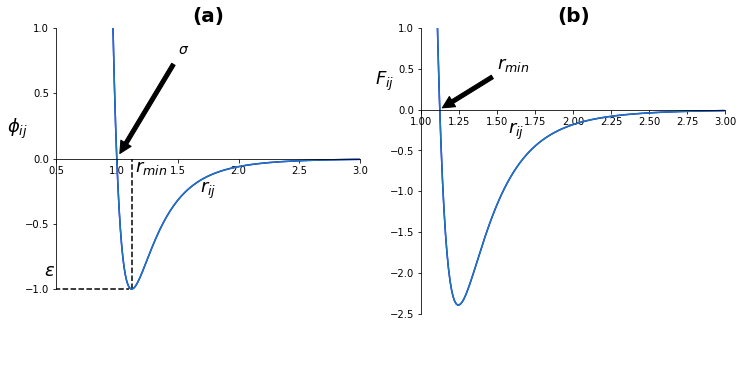

In [3]:
from inputs.Tut_1.main import LJ_fig

<div style="text-align: center">**Figure 1:** Shapes of (a) the Lennard-Jones potential, $\phi(r_{ij})$, between two particles and (b) the corresponding force, $F(r_{ij})$ acting between the two particles. </div>

This model system has limited use in real world applications as it neglects all other possible intermolecular interactions, such as the Coulombic, permanent dipole-dipole and hydrogen bonding.  However, Lennard-Jones solids have been used to model the phase behaviour of noble gases, like Argon, with a reasonable degree of accuracy [1], [2], [3].

### Exercise 1)

In this exercise, we will be running molecular dynamics calculations on a 3D model of a Lennard-Jones solid in an face-centred cubic (fcc) arrangement to predict its behaviour when the temperature is raised.

In [1]:
# Draw upon the input files for the first calculation at around the melting point

Now you will run the simulation using these input files.  

In [2]:
# Run the DLPOLY calculation, this will take around 10 minutes

Once the calculation has successfully completed, it is now time to begin the analysis of the output data.  For this exercise, we begin by examining both the initial and final configurations of your system and seeing what differences, if any, are present. 

In [3]:
# Visualise the initial and final DLPOLY configuration files

Rationalise any observed differences between the initial and final configurations.

You can also visualise the time evolution of the system:

In [4]:
# Visualise the HISTORY file somehow

Repeat the calculation for the other temperatures in the other directories. 

What do you notice about the final configuration of the system as the temperature increases? What happens to the solid? 

In [3]:
a = input()

Qualitatively determine and record the temperature(s) at which any significant transitions occur.  

In [4]:
b = input()

## Part 2: Energy in Molecular Dynamics Simulations

This part of the tutorial aims to help solidify your understanding of how kinetic and potential energy are treated in molecular dynamics and help to monitor the simulation.  The total energy of any thermodynamic system, *E*, can be broken down into the contributions from both kinetic, *KE*, and potential energy, *U*, such that:

$$E = U + KE$$

The conservation of total energy (*E* = constant) is critical to maintaining physicality of the system.  So if *KE* decreases, *U* must increase to keep *E* constant and vice-versa.  According to Kinetic Theory, the kinetic energy is directly proportional to the mean square speed of our particles, which in turn defines the temperature of the system:

$$KE = \frac{1}{2}m\langle c^{2} \rangle = \frac{3}{2}RT$$

where *m* is the total mass of all the particles, *R* is the molar gas constant, and *c* is the speed of the particle (in an arbitrary direction), the <$\dots$> represent taking the average value of the variable inside them.  In this case, the average is conducted over all particles in the system.

In our model (and many other classical models), the total potential energy of the system is the sum of the interaction energies of each particle with the rest of the system: 

$$U = \sum_{i} \psi_{i}$$

where:

$$\psi_i = \sum_{j=1,j \neq i}^{N-1} \phi(r_{ij})$$

where *N* is the total number of particles in a system and $\psi_i$ is the total interaction energy of particle i with all other particles in the system (excluding itself).   

The Lennard-Jones potential represents a short-range interaction ($r_{ij}^{-6}$ and $r_{ij}^{-12}$), the contribution to the total interaction becomes infinitesimal as particles become further apart.  Also, the calculation time increases considerably if we explicitly calculate the interaction energy for each particle pair, so it is common to often invoke a cut-off distance.  By convention, this is taken as 2.5 $\sigma$ and is stated in the CONTROL file of the simulation. For a given particle, only particles within the cut-off are assumed to significantly contribute to the interaction energy.  This introduces a small but easily-correctable error in our calculated values. 

### Exercise 2)

In this part of the tutorial, we will extract total, potential and kinetic energies of the system from the OUTPUT file and plot them as a function of temperature.

In [5]:
# matplotlib plot of the energies from analysis
plot.figure()
plt.xlabel("T")
plt.ylabel("Energy")
plt.title("Different system energies as a function of temperature")
plt.plot(T, E, 'bo')
plt.plot(T, KE, 'g+')
plt.plot(T, U, 'r^')
plt.legend()

Comment on the shape of the plots.  Do these plots indicate the presence of a phase transition?

In [5]:
c = input()

## Part 3: Cooling in Molecular Dynamics Simulations

As you have seen from the tutorial so far, potential modelling of physical systems can reliably and accurately simulate the thermodynamic behaviour when increasing the temperature.  However, it can be a lot harder to cool a system back down in a way that reflects observed behaviour of real materials.

### Exercise 3)

In this final exercise, we will do the reverse of what was done in exercise 1: we will cool the system down from a temperature above the melting point to one *just* below it.

In [6]:
# setup and run a simulation based on the final configuration from one of the T > Tm calculations i.e. REVCON becomes CONFIG 
# increase the length of the calculation x10 and decrease T in CONTROL file. 

Now let's visualise the results like we did in exercise 1:

In [7]:
# visualise the results in the same manner as above

Is this what you expect? Is this behaviour supported by thermodynamic theory?

In [6]:
d = input()

It is far more difficult to accurately model a system's thermodynamic behaviour when reducing the temperature using MD (or any potential modelling technique) primarily because of entropy, *S*, and the Third Law of Thermodynamics.  The Third Law of Thermodynamics can be stated as $S \geq 0$.  When you cool a system, its entropy decreases, but this corresponds to an increase in entropy of its surroundings such that the Third Law of Thermodynamics is obeyed.  In a computational simulation, it is difficult to define 'entropy' and 'the surroundings' in this way, so when you cool a system from a temperature where it is liquid to one where it is solid, the observed 'disorder' of a system will not change, and the system will still appear to be liquid (or it may become a glass, if you run for long enough times).  Also, a system crystallises when the atoms within the system enter into a fixed orientation relative to one another, if all the atoms are freely moving, this outcome is **highly** unlikely.

In this simulation, we have been modelling the solid-liquid phase transition of our Lennard-Jones material primarily because we have operated under the constraint that the volume of the system is constant and the volume change between the solid and liquid phases is small compared to the solid-gas and liquid-gas volume change.  Our system volume is slightly larger than is required for the solid state to form so that the phase transition to liquid can be readily observed, but this also means that when trying to freeze the liquid back into a more condensed solid is more difficult. Trying to re-create the more condensed solid from the liquid in the expanded volume creates an additional energy barrier that needs to be overcome before freezing can occur. 

## Conclusions:

In this session, you have been introduced to the potential modelling technique, Molecular Dynamics (MD).  You should now be aware of the approximations employed by potential models and how MD can be used to calculate useful properties in dynamic systems.  You have illustrated the use of MD to simulate a model system of a Lennard-Jones solid to observe its thermodynamic behaviour as you change its temperature and compared it to the behaviour of real systems.  By the end of this session, you should have:

- determined a phase transition, both qualitatively from the time-evolution of the system and more quantitatively from plots of system energies
- seen how potential modelling techniques deal with thermodynamic quantities like energy, entropy and particle trajectories 
- appreciated the limitations of such techniques in recovering the full range of observed thermal behaviour of real-life systems

Now that you have an awareness of MD techniques, we will move onto introducing the general theory and methodology of Monte Carlo simulations.

## Extensions (optional):

1. In your studies you may have come across the idea of latent heat of phase transitions.  Latent heat, *L*, can be described as the energy required for all particles in a material to overcome thermal activation barriers and become more mobile in a less condensed phase (solid-liquid, liquid-gas).  This is observed as a plateau at the transition temperature of heating curves, where no change in temperature is seen despite heat flowing into the system, or as a step-change in the potential energy at the phase transition as a function of temperature.  From your plot of *U* vs *T*, estimate the latent heat for the solid-liquid phase transition of the Lennard-Jones material.

In [1]:
# Code for estimating latent heat from each output file from each T > Tm collate them up and average them 
# (I guess a standard deviation/standard error of this value would be nice too) 

2. A widely-used classification of phase transitions is the Ehrenfest classification, which describes phase transitions as n<sup>th</sup> order, where n is the n<sup>th</sup> order temperature derivative of an intrinsic quantity where a discontinuity occurs (see Figure 3).  For instance, the liquid-gas phase transition is described as a 1<sup>st</sup> order phase transition as there is a discontinuity in $C_{v} = \frac{\partial U}{\partial T}$.  While a solid-solid phase transition is a 2<sup>nd</sup> order phase transition as there is a discontinuity in $\frac{\partial C_{v}}{\partial T} = \frac{\partial^{2} U}{\partial T^{2}}$.  Figure 2 below shows the graphical definitions of Ehrenfest phase transitions in terms of: Gibbs Free Energy, *G*, system volume, *V*, enthalpy *H*, entropy, *S*, and heat capacity at constant pressure $C_{p}$. 

<img src="images/Tut_1_images/Ehrenfest.png" />

<div style="text-align: center">**Figure 2:** Behaviour of different system properties with temperature for 0<sup>th</sup>, 1<sup>st</sup> and 2<sup>nd</sup> order Ehrenfest phase transitions. </div>

With this in mind, what type of phase transition is your Lennard-Jones system undergoing and why?

In [7]:
e = input()

## References:

[1] W. T. Ashurst and W. G. Hoover, "Argon Shear Viscosity via a Lennard-Jones Potential with Equilibrium and Nonequilibrium Molecular Dynamics", *Phys. Rev. Lett.*, 31, 4, 206-208, July 1973.

[2] B. W. Davies, "Radial Distribution Function for Argon: Calculations from Thermodynamic Properties and the Lennard-Jones 6:12 Potential", *J. Chem. Phys.*, 54, 11, pp.4616-4625, June 1971. 

[3] R. O. Watts, "Percus-Yevick Approximation for the Truncated Lennard-Jones (12, 6) Potential Applied to Argon", *J. Chem. Phys.*, 50, 2, pp. 984-988, January 1969.  